<a href="https://colab.research.google.com/github/Betselot99/Employee-Retention-Analysis/blob/main/Assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Betselot Berhanu    WTF/2025/8987

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the CSV file from Drive (adjust path if your file is in a different location)
file_path = '/content/drive/MyDrive/HR_comma_sep.csv'  # Update if needed
df = pd.read_csv(file_path)

In [5]:
# Step 1: Exploratory Data Analysis (EDA)
print("=== EDA Summary ===")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:", df.isnull().sum().sum(), "(none)")

=== EDA Summary ===
Shape: (14999, 10)
Columns: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']
Missing values: 0 (none)


In [6]:
# Correlations for numerical features with 'left'
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                  'average_montly_hours', 'time_spend_company', 'Work_accident',
                  'promotion_last_5years']
corr = df[numerical_cols + ['left']].corr()['left'].sort_values(ascending=False)
print("\nCorrelations with 'left' (retention target):\n", corr)

# Leave rates by categorical variables
print("\nLeave rate by salary:\n", df.groupby('salary')['left'].mean().sort_values(ascending=False))
print("\nLeave rate by department:\n", df.groupby('Department')['left'].mean().sort_values(ascending=False))

# Insights from EDA:
# - Strong impacts: satisfaction_level (-0.39 corr, higher → stay), time_spend_company (0.14, longer → leave),
#   Work_accident (-0.15, accident → stay), promotion_last_5years (-0.06, promoted → stay).
# - Moderate: average_montly_hours (0.07, more hours → leave), number_project (0.02, more → leave).
# - Categorical: Lower salary → higher leave (low: 29.7%, high: 6.6%). Departments vary (HR: 29%, management: 14.4%).
# - Weak: last_evaluation (excluded from model).


Correlations with 'left' (retention target):
 left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

Leave rate by salary:
 salary
low       0.296884
medium    0.204313
high      0.066289
Name: left, dtype: float64

Leave rate by department:
 Department
hr             0.290934
accounting     0.265971
technical      0.256250
support        0.248991
sales          0.244928
marketing      0.236597
IT             0.222494
product_mng    0.219512
RandD          0.153748
management     0.144444
Name: left, dtype: float64


/tmp/ipython-input-1922840915.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='salary', y='left', data=df, order=['low', 'medium', 'high'], ci=None)


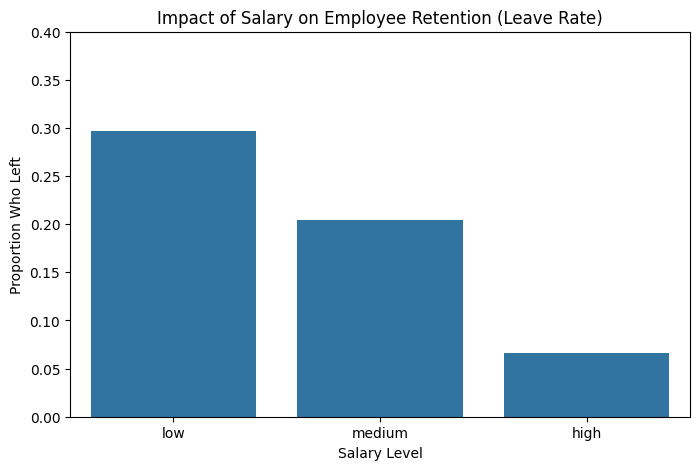

In [7]:
# Step 2: Bar chart for impact of salaries on retention (leave rate)
plt.figure(figsize=(8, 5))
sns.barplot(x='salary', y='left', data=df, order=['low', 'medium', 'high'], ci=None)
plt.title('Impact of Salary on Employee Retention (Leave Rate)')
plt.ylabel('Proportion Who Left')
plt.xlabel('Salary Level')
plt.ylim(0, 0.4)
plt.show()

/tmp/ipython-input-228668787.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Department', y='left', data=df, ci=None)


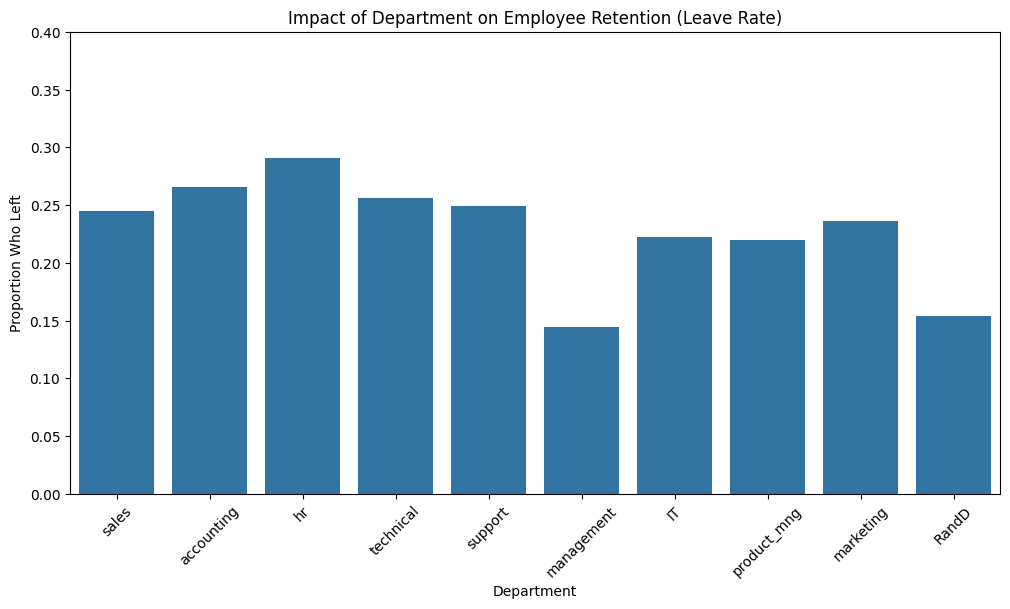

In [8]:
# Step 3: Bar chart for correlation between department and retention (leave rate)
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='left', data=df, ci=None)
plt.title('Impact of Department on Employee Retention (Leave Rate)')
plt.ylabel('Proportion Who Left')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylim(0, 0.4)
plt.show()

In [9]:
# Preprocess for model
# Encode salary (ordinal: low=0, medium=1, high=2)
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})

# One-hot encode Department
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

# Selected features from EDA
features = ['satisfaction_level', 'number_project', 'average_montly_hours',
            'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary'] + \
           [col for col in df.columns if 'Department_' in col]
X = df[features]
y = df['left']

In [10]:
# Step 4: Build logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, solver='liblinear')  # liblinear for faster convergence
model.fit(X_train, y_train)

# Step 5: Measure accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\n=== Model Performance ===")
print(f"Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Model Performance ===
Accuracy: 0.7950 (79.50%)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.87      2294
           1       0.60      0.37      0.46       706

    accuracy                           0.80      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.77      0.80      0.78      3000

